# Corona Virus Data Analysis with AI and ML

## 1- Import modules and packages

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
from datetime import date

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 10,10
rcParams['font.size'] = 15
sb.set_style('whitegrid')
sb.set_palette("pastel")

## 2- Read the Data and explore it

In [4]:
corona = pd.read_csv('COVID-19-geographic-disbtribution-worldwide.csv',parse_dates=True) 

In [6]:
corona.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
0,25/03/2020,25,3,2020,2,0,Afghanistan,AF,37172386.0
1,24/03/2020,24,3,2020,6,1,Afghanistan,AF,37172386.0
2,23/03/2020,23,3,2020,10,0,Afghanistan,AF,37172386.0
3,22/03/2020,22,3,2020,0,0,Afghanistan,AF,37172386.0
4,21/03/2020,21,3,2020,2,0,Afghanistan,AF,37172386.0


In [7]:
corona.sample(5)

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
1630,19/03/2020,19,3,2020,11,0,Democratic_Republic_of_the_Congo,CD,84068091.0
4109,15/03/2020,15,3,2020,12,0,Moldova,MD,3545883.0
1212,02/02/2020,2,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN
6094,13/01/2020,13,1,2020,0,0,Switzerland,CH,8516543.0
3752,19/02/2020,19,2,2020,0,0,Lithuania,LT,2789533.0


## 3- Prepare Data

### 3.1 Remove DateRep & GeoId

In [8]:
corona.drop(['DateRep','GeoId'],axis=1,inplace=True)
corona.head()

,Day,Month,Year,Cases,Deaths,Countries and territories,Pop_Data.2018
0,25,3,2020,2,0,Afghanistan,37172386.0
1,24,3,2020,6,1,Afghanistan,37172386.0
2,23,3,2020,10,0,Afghanistan,37172386.0
3,22,3,2020,0,0,Afghanistan,37172386.0
4,21,3,2020,2,0,Afghanistan,37172386.0


### 3.2 Check for NaN values

In [9]:
corona.isna().any()

Day                          False
Month                        False
Year                         False
Cases                        False
Deaths                       False
Countries and territories    False
Pop_Data.2018                 True
dtype: bool

In [10]:
corona['Pop_Data.2018'].fillna(0,inplace=True)
corona.isna().any()

Day                          False
Month                        False
Year                         False
Cases                        False
Deaths                       False
Countries and territories    False
Pop_Data.2018                False
dtype: bool

### 3.3 Change th values of Pop_Data.2018 column

In [11]:
corona['Pop_Data.2018'] = (corona['Pop_Data.2018']/float(1000000)).round(2)
corona.sample(5)

,Day,Month,Year,Cases,Deaths,Countries and territories,Pop_Data.2018
6272,1,1,2020,0,0,Thailand,69.43
1665,26,2,2020,0,0,Denmark,5.80
3284,13,3,2020,2651,189,Italy,60.43
5474,3,3,2020,1,0,Saudi_Arabia,33.70
350,27,1,2020,0,0,Australia,24.99


### 3.4 Rename some columns 

In [12]:
corona.rename({'Pop_Data.2018':'Population', 
               'Countries and territories':'Countries'},
              axis=1, inplace=True)
corona.head()

,Day,Month,Year,Cases,Deaths,Countries,Population
0,25,3,2020,2,0,Afghanistan,37.17
1,24,3,2020,6,1,Afghanistan,37.17
2,23,3,2020,10,0,Afghanistan,37.17
3,22,3,2020,0,0,Afghanistan,37.17
4,21,3,2020,2,0,Afghanistan,37.17


### 3.5 Remove zero days

In [13]:
def drop_zero_days(data,country):
    df = data[data['Countries'] == country].reset_index(drop=True)
    first_infected_day = df[df['Cases'] != 0 ].tail(1).index[0]
    result = df.drop(df.index[first_infected_day+1:])
    return result

def concatenate_countries_dfs(dfs):
    df = DataFrame()
    for d in dfs :
        df = pd.concat([df,d],ignore_index=True)
    return df

coutries = corona['Countries'].unique()
corona_dfs_list = []
for country in coutries:
    df = drop_zero_days(corona, country)
    if len(df) != 0:
        corona_dfs_list.append(df)    
corona_updated = concatenate_countries_dfs(corona_dfs_list)
corona_updated.head(3)

,Day,Month,Year,Cases,Deaths,Countries,Population
0,25,3,2020,2,0,Afghanistan,37.17
1,24,3,2020,6,1,Afghanistan,37.17
2,23,3,2020,10,0,Afghanistan,37.17


## 4- Explore Data

In [14]:
corona_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 7 columns):
Day           3727 non-null int64
Month         3727 non-null int64
Year          3727 non-null int64
Cases         3727 non-null int64
Deaths        3727 non-null int64
Countries     3727 non-null object
Population    3727 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 203.9+ KB


In [15]:
corona_updated.describe()

,Day,Month,Year,Cases,Deaths,Population
count,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000,3727.000000
mean,16.763617,2.665683,2019.999732,111.863697,4.981218,89.628556
std,7.494653,0.584153,0.016380,610.113339,36.601966,262.035784
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,0.000000
25%,11.000000,2.000000,2020.000000,0.000000,0.000000,4.670000
50%,18.000000,3.000000,2020.000000,3.000000,0.000000,15.850000
75%,23.000000,3.000000,2020.000000,18.500000,0.000000,60.430000
max,31.000000,12.000000,2020.000000,15141.000000,795.000000,1392.730000


In [16]:
corona_updated[corona_updated['Cases'].eq(float(-9))]

,Day,Month,Year,Cases,Deaths,Countries,Population
606,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.0


In [17]:
corona_updated[corona_updated['Cases'] == 15141]

,Day,Month,Year,Cases,Deaths,Countries,Population
718,13,2,2020,15141,254,China,1392.73


In [18]:
corona_updated[corona_updated['Deaths'] == 795]

,Day,Month,Year,Cases,Deaths,Countries,Population
1686,22,3,2020,6557,795,Italy,60.43


In [19]:
corona_updated[corona_updated['Countries'] == 'China'].describe()

,Day,Month,Year,Cases,Deaths,Population
count,86.000000,86.000000,86.000000,86.000000,86.000000,8.600000e+01
mean,14.965116,2.046512,2019.988372,951.709302,38.220930,1.392730e+03
std,8.538422,1.353922,0.107833,1919.121183,47.552176,1.143536e-12
min,1.000000,1.000000,2019.000000,0.000000,0.000000,1.392730e+03
25%,8.000000,1.000000,2020.000000,22.000000,1.500000,1.392730e+03
50%,15.000000,2.000000,2020.000000,138.000000,19.500000,1.392730e+03
75%,22.000000,3.000000,2020.000000,1671.500000,55.750000,1.392730e+03
max,31.000000,12.000000,2020.000000,15141.000000,254.000000,1.392730e+03


In [20]:
corona_updated[corona_updated['Countries'] == 'Italy'].describe()

,Day,Month,Year,Cases,Deaths,Population
count,55.000000,55.000000,55.0,55.000000,55.000000,5.500000e+01
mean,14.381818,2.436364,2020.0,1257.745455,124.000000,6.043000e+01
std,8.238327,0.536230,0.0,1999.336234,216.325715,5.019642e-14
min,1.000000,1.000000,2020.0,0.000000,0.000000,6.043000e+01
25%,7.500000,2.000000,2020.0,0.000000,0.000000,6.043000e+01
50%,14.000000,2.000000,2020.0,93.000000,4.000000,6.043000e+01
75%,21.000000,3.000000,2020.0,1644.500000,170.000000,6.043000e+01
max,31.000000,3.000000,2020.0,6557.000000,795.000000,6.043000e+01


In [21]:
corona_updated['Countries'].value_counts()

China                               86
Japan                               71
Thailand                            66
South_Korea                         66
United_States_of_America            65
                                    ..
Myanmar                              2
Saint_Vincent_and_the_Grenadines     2
Libya                                1
Turks_and_Caicos_islands             1
Laos                                 1
Name: Countries, Length: 189, dtype: int64

In [22]:
corona_updated.corr()

,Day,Month,Year,Cases,Deaths,Population
Day,1.000000,-0.157274,-0.031123,0.034724,0.042959,-0.058391
Month,-0.157274,1.000000,-0.261814,0.033624,0.038568,-0.202946
Year,-0.031123,-0.261814,1.000000,0.002279,0.002230,-0.081481
Cases,0.034724,0.033624,0.002279,1.000000,0.716718,0.186255
Deaths,0.042959,0.038568,0.002230,0.716718,1.000000,0.113666
Population,-0.058391,-0.202946,-0.081481,0.186255,0.113666,1.000000


## 5- Data Analysis

### 5.1 Finding the daily average of deaths & cases globally

In [23]:
d1 = date(2020,3,25)
d2 = date(2019,12,1)
corona_days = (d1-d2).days

In [24]:
corona_gloabl_deaths_avg = corona_updated['Deaths'].sum() / corona_days
corona_gloabl_cases_avg = corona_updated['Cases'].sum() / corona_days
print(corona_gloabl_deaths_avg,corona_gloabl_cases_avg)

161.43478260869566 3625.3565217391306


<BarContainer object of 2 artists>

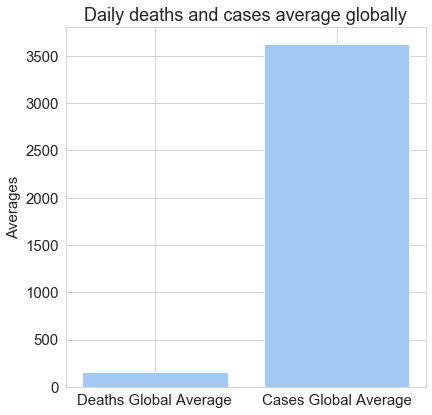

In [25]:
x = ['Deaths Global Average','Cases Global Average']
y = [corona_gloabl_deaths_avg,corona_gloabl_cases_avg]

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_ylabel('Averages')
ax.set_title('Daily deaths and cases average globally')


ax.bar(x,y)

### 5.2 Finding the daily average of deaths & cases by country

In [26]:
avg_by_country = corona_updated.groupby('Countries')[['Deaths','Cases']].agg([sum]).sort_values(by=('Deaths','sum'))
avg_by_country = avg_by_country / corona_days
avg_by_country

,Deaths,Cases
,sum,sum
Countries,,
Jordan,0.000000,1.104348
Greenland,0.000000,0.034783
Myanmar,0.000000,0.026087
Gibraltar,0.000000,0.130435
Namibia,0.000000,0.026087
...,...,...
France,9.565217,193.930435
Iran,16.817391,215.747826


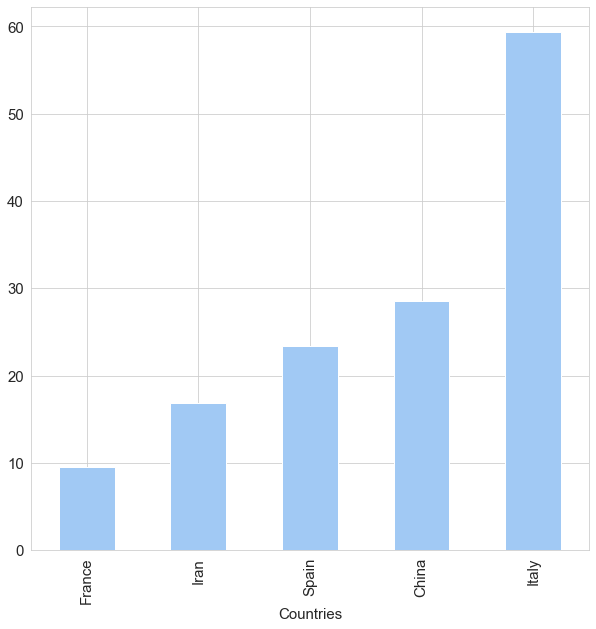

In [27]:
avg_by_country['Deaths']['sum'].tail(5).plot(kind='bar')

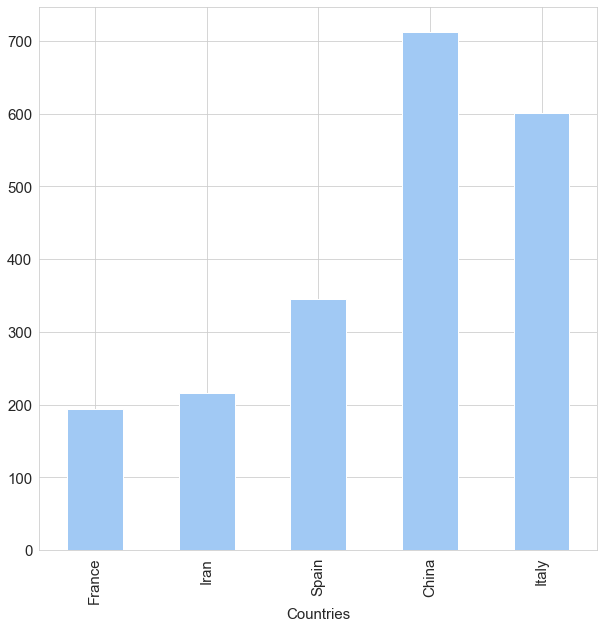

In [28]:
avg_by_country['Cases']['sum'].tail(5).plot(kind='bar')

### 5.3 Finding the sum of deaths & cases by month

In [29]:
sum_by_month = corona_updated.groupby('Month')[['Deaths','Cases']].agg([sum]).sort_values(by=('Deaths','sum'))

In [30]:
sum_by_month

,Deaths,Cases
,sum,sum
Month,,
12,0,27
1,213,9799
2,2708,75377
3,15644,331713


([<matplotlib.patches.Wedge at 0x26e6bf12ef0>,
 [Text(1.1, 0.0, '12'),
  Text(1.099285528834166, 0.03963995579951817, '1'),
  Text(0.9488989822941126, 0.5564087718586018, '2'),
  Text(-0.9683336157397772, -0.5218524778405575, '3')],
 [Text(0.6, 0.0, '0.0%'),
  Text(0.5996102884549996, 0.021621794072464454, '1.1%'),
  Text(0.5175812630695159, 0.3034956937410555, '14.6%'),
  Text(-0.5281819722216966, -0.28464680609484955, '84.3%')])

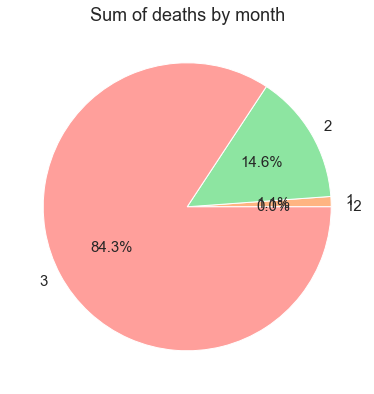

In [31]:
x = sum_by_month.index.tolist()
y = sum_by_month['Deaths']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Sum of deaths by month')
ax.set_yticklabels(x)

ax.pie(y,labels=x,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x26e6c1420b8>,
 [Text(1.09999997723368, 0.00022379880171735812, '12'),
  Text(1.0969695801730637, 0.08159497640745127, '1'),
  Text(0.8298280615415661, 0.7220702100752855, '2'),
  Text(-0.8809691104515033, -0.6587058724729022, '3')],
 [Text(0.5999999875820072, 0.0001220720736640135, '0.0%'),
  Text(0.598347043730762, 0.04450635076770069, '2.4%'),
  Text(0.45263348811358145, 0.393856478222883, '18.1%'),
  Text(-0.4805286057008199, -0.3592941122579466, '79.6%')])

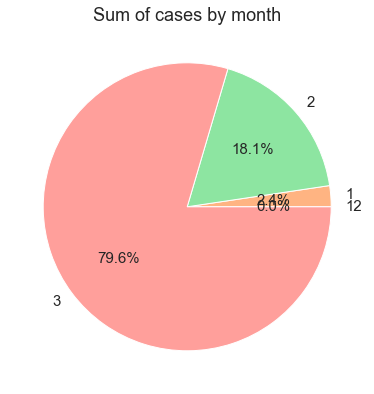

In [32]:
x = sum_by_month.index.tolist()
y = sum_by_month['Cases']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Sum of cases by month')
ax.set_yticklabels(x)

ax.pie(y,labels=x,autopct='%1.1f%%')

### 5.4 Finding the sum of deaths & cases by month for every country

In [33]:
sum_by_month_country = corona_updated.groupby(['Countries','Month'])[['Deaths','Cases']].agg([sum]).sort_index()

In [34]:
sum_by_month_country.loc[['China','Italy']]

Deaths  Cases
                   sum    sum
Countries Month              
China     1        213   9687
          2       2624  69641
          3        450   2492
          12         0     27
Italy     1          0      3
          2         21    885
          3       6799  68288

### 5.5 Finding the first 5 countries whose have the most total of deaths and cases

<BarContainer object of 5 artists>

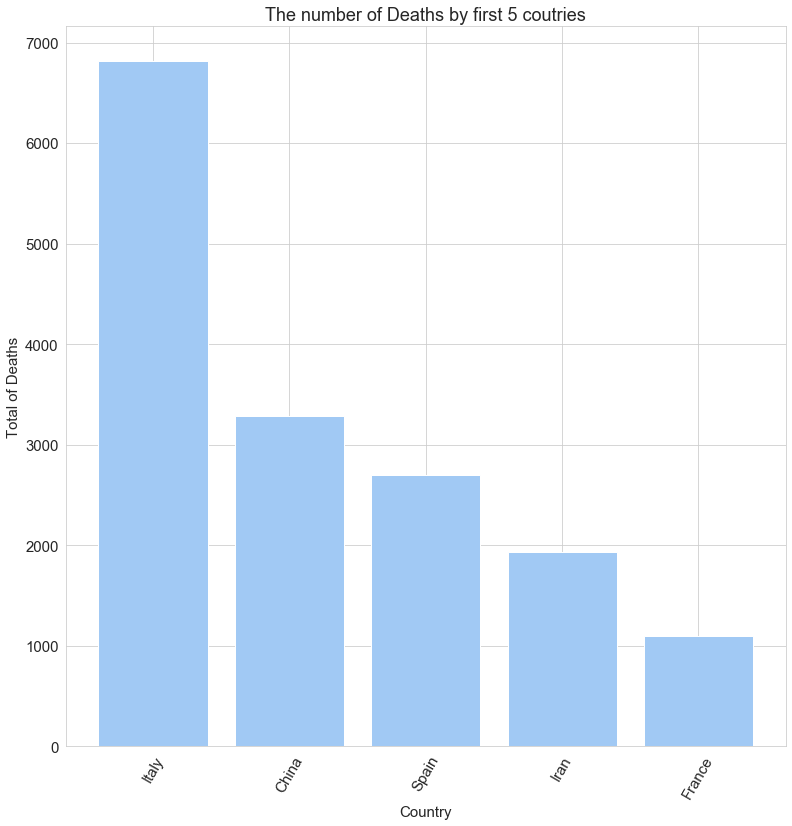

In [35]:
corona_by_country = corona_updated.groupby('Countries')
deaths_by_country_sum = corona_by_country['Deaths'].sum()
deaths_by_country_sum = deaths_by_country_sum.sort_values(ascending=False).head(5)

x = deaths_by_country_sum.index.tolist()
y = deaths_by_country_sum

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlabel('Country')
ax.set_ylabel('Total of Deaths')
ax.set_title('The number of Deaths by first 5 coutries')
ax.set_xticklabels(x,rotation=60,horizontalalignment='center')

ax.bar(x,y)

### 5.6 Time series for deaths and cases in China

In [36]:
def time_series_by_country(country):
    corona_by_day_ser = corona[corona['Countries']==country].sort_values(by=['Year','Month','Day']).reset_index(drop=True) #.sort_values(by=['Deaths']).reset_index(drop=True)
    x = corona_by_day_ser.index
    y = corona_by_day_ser[['Deaths','Cases']]

    max_deaths_v = y['Deaths'].max()
    max_deaths_i = corona_by_day_ser['Deaths'].idxmax()

    max_cases_v =  y['Cases'].max()
    max_cases_i = corona_by_day_ser['Cases'].idxmax()

    fig = plt.figure()
    ax = fig.add_axes([.1,.1,1,1])

    ax.set_xlabel('Over time')
    ax.set_ylabel('Total of Deaths & Cases')
    ax.set_title('Deaths & cases over the time for '+ country)
    ax.set_xticklabels(' ')

    ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v),xy=(max_deaths_i,max_deaths_v),xytext=( int(max_deaths_i)+5  ,int(max_deaths_v) + 50),
               arrowprops=dict(facecolor='red',shrink=0.05))

    ax.annotate('Max Cases \n {} cases'.format(max_cases_v) ,xy=(max_cases_i,max_cases_v),xytext=( int(max_cases_i)+5  ,int(max_cases_v) + 50),
               arrowprops=dict(facecolor='red',shrink=0.05))

    ax.plot(x,y)


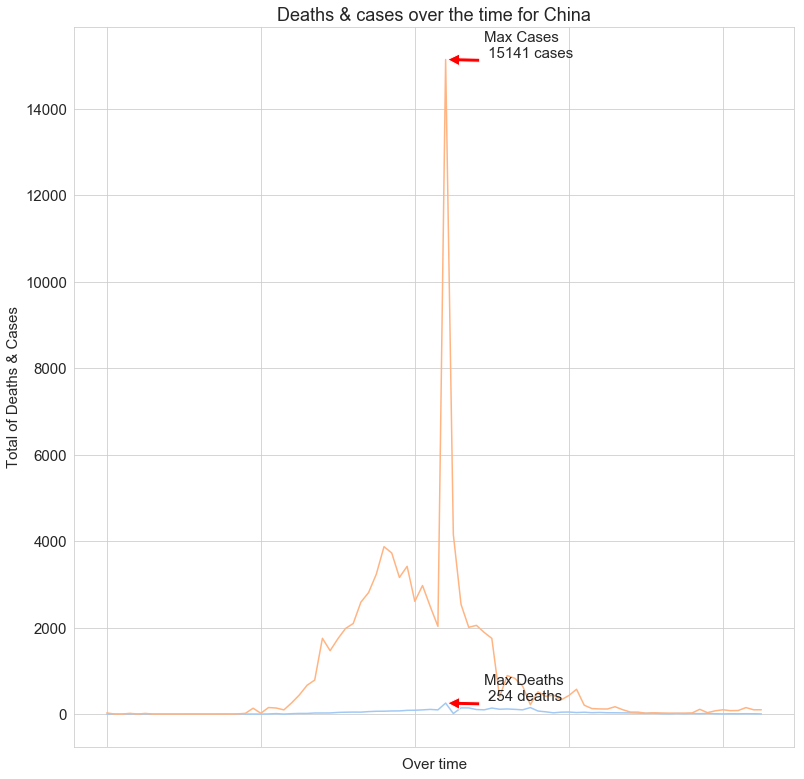

In [176]:
time_series_by_country('China')

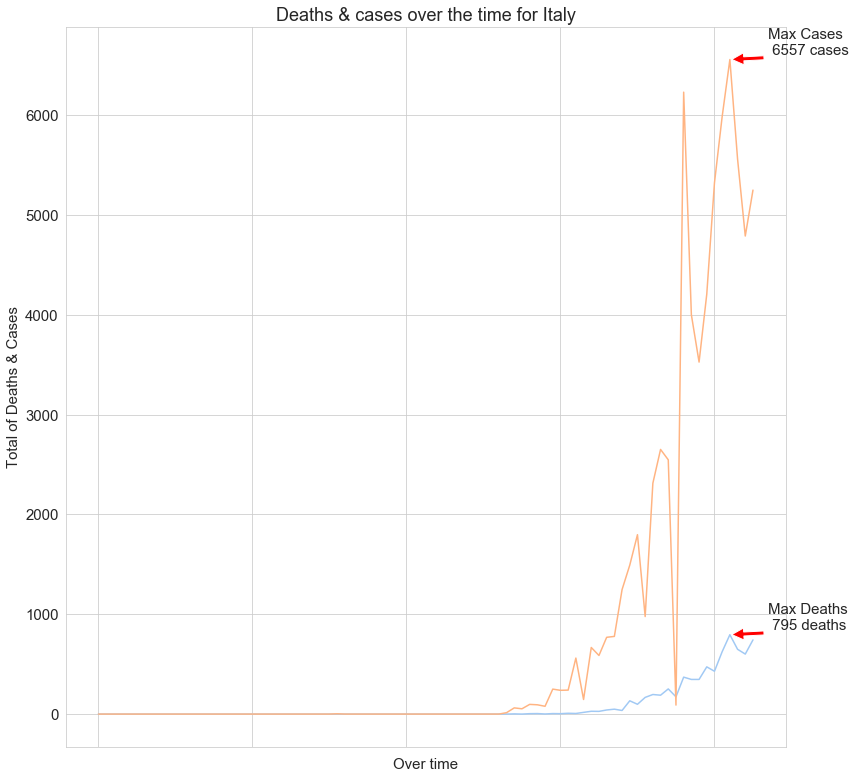

In [37]:
time_series_by_country('Italy')

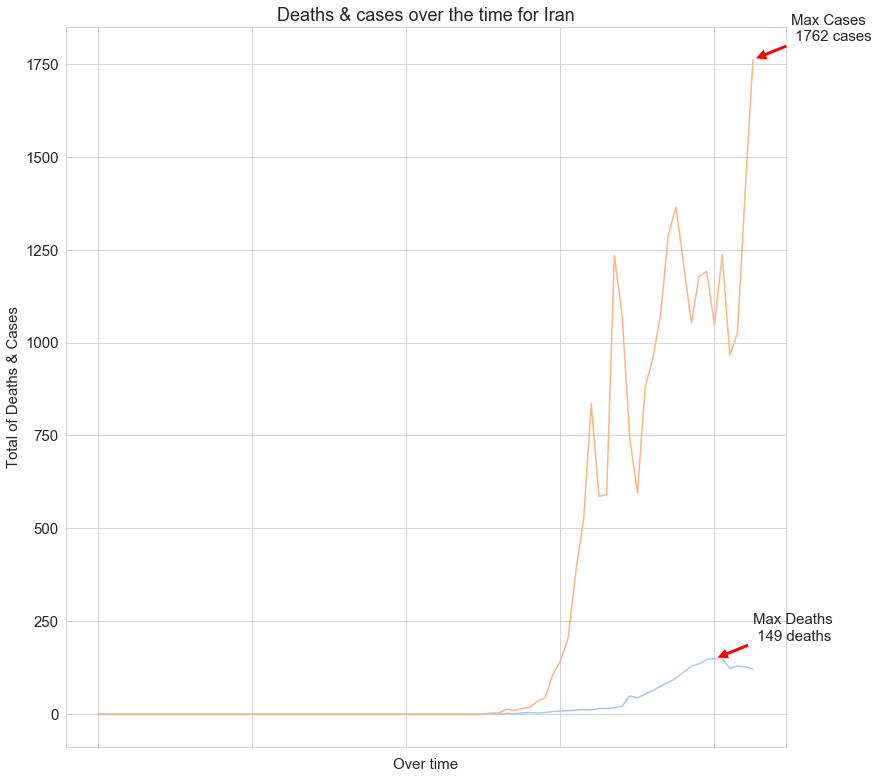

In [38]:
time_series_by_country('Iran')

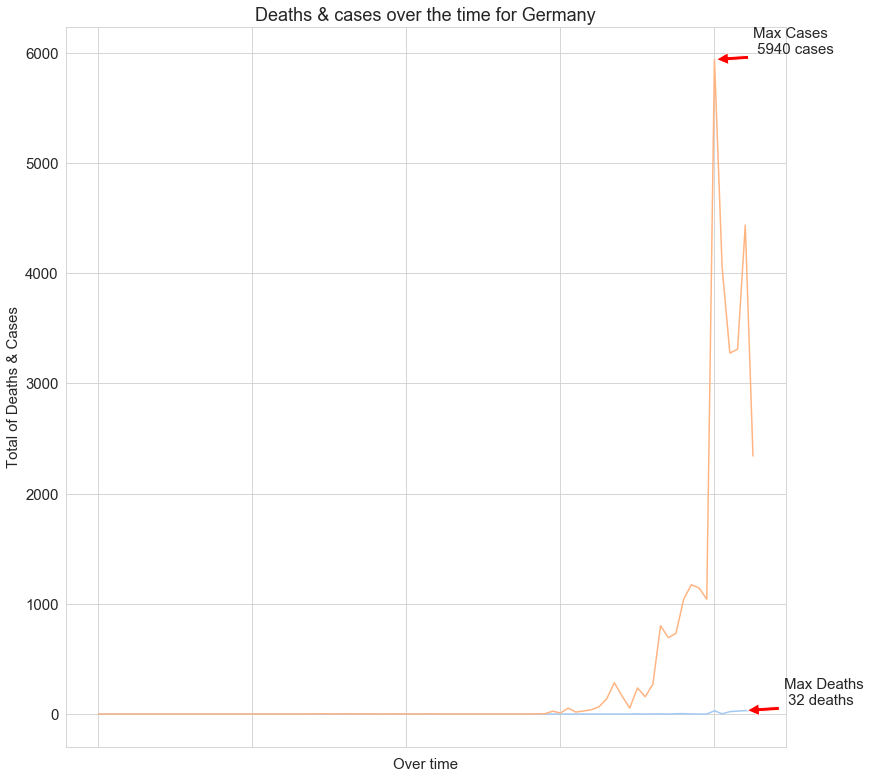

In [39]:
time_series_by_country('Germany')

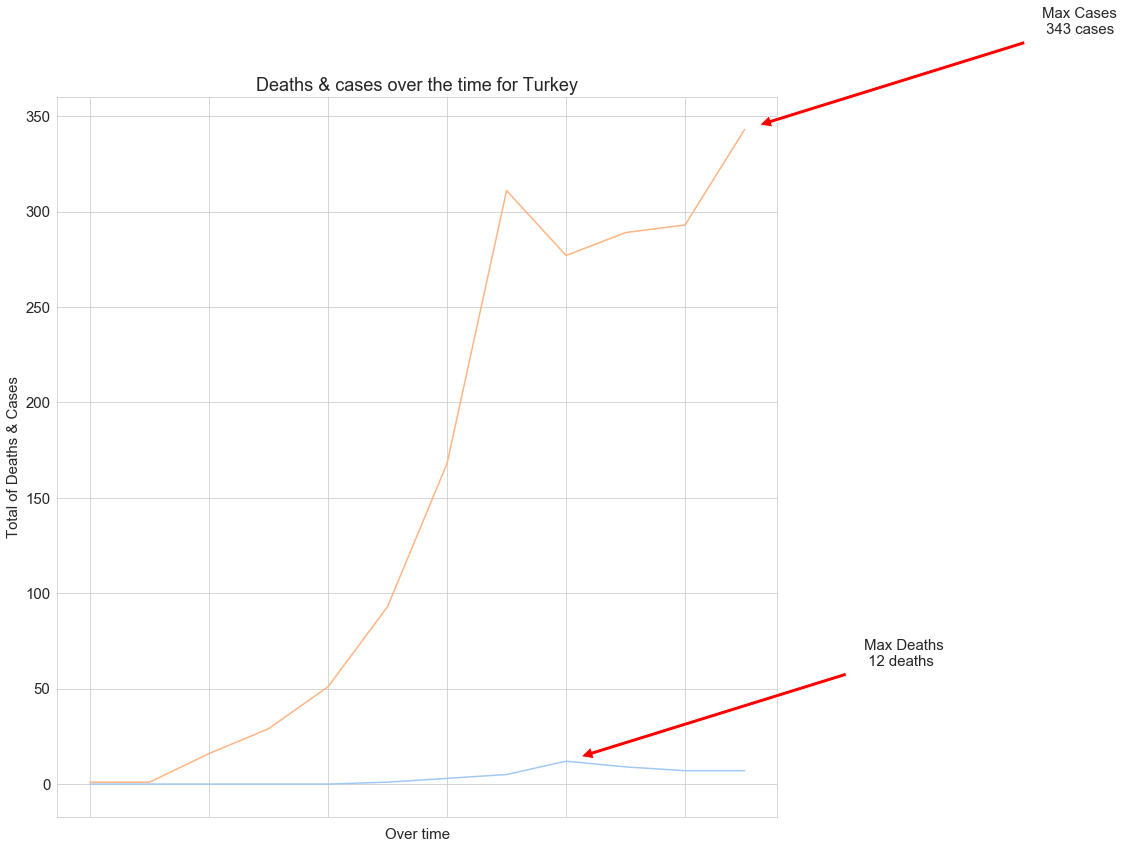

In [40]:
time_series_by_country('Turkey')

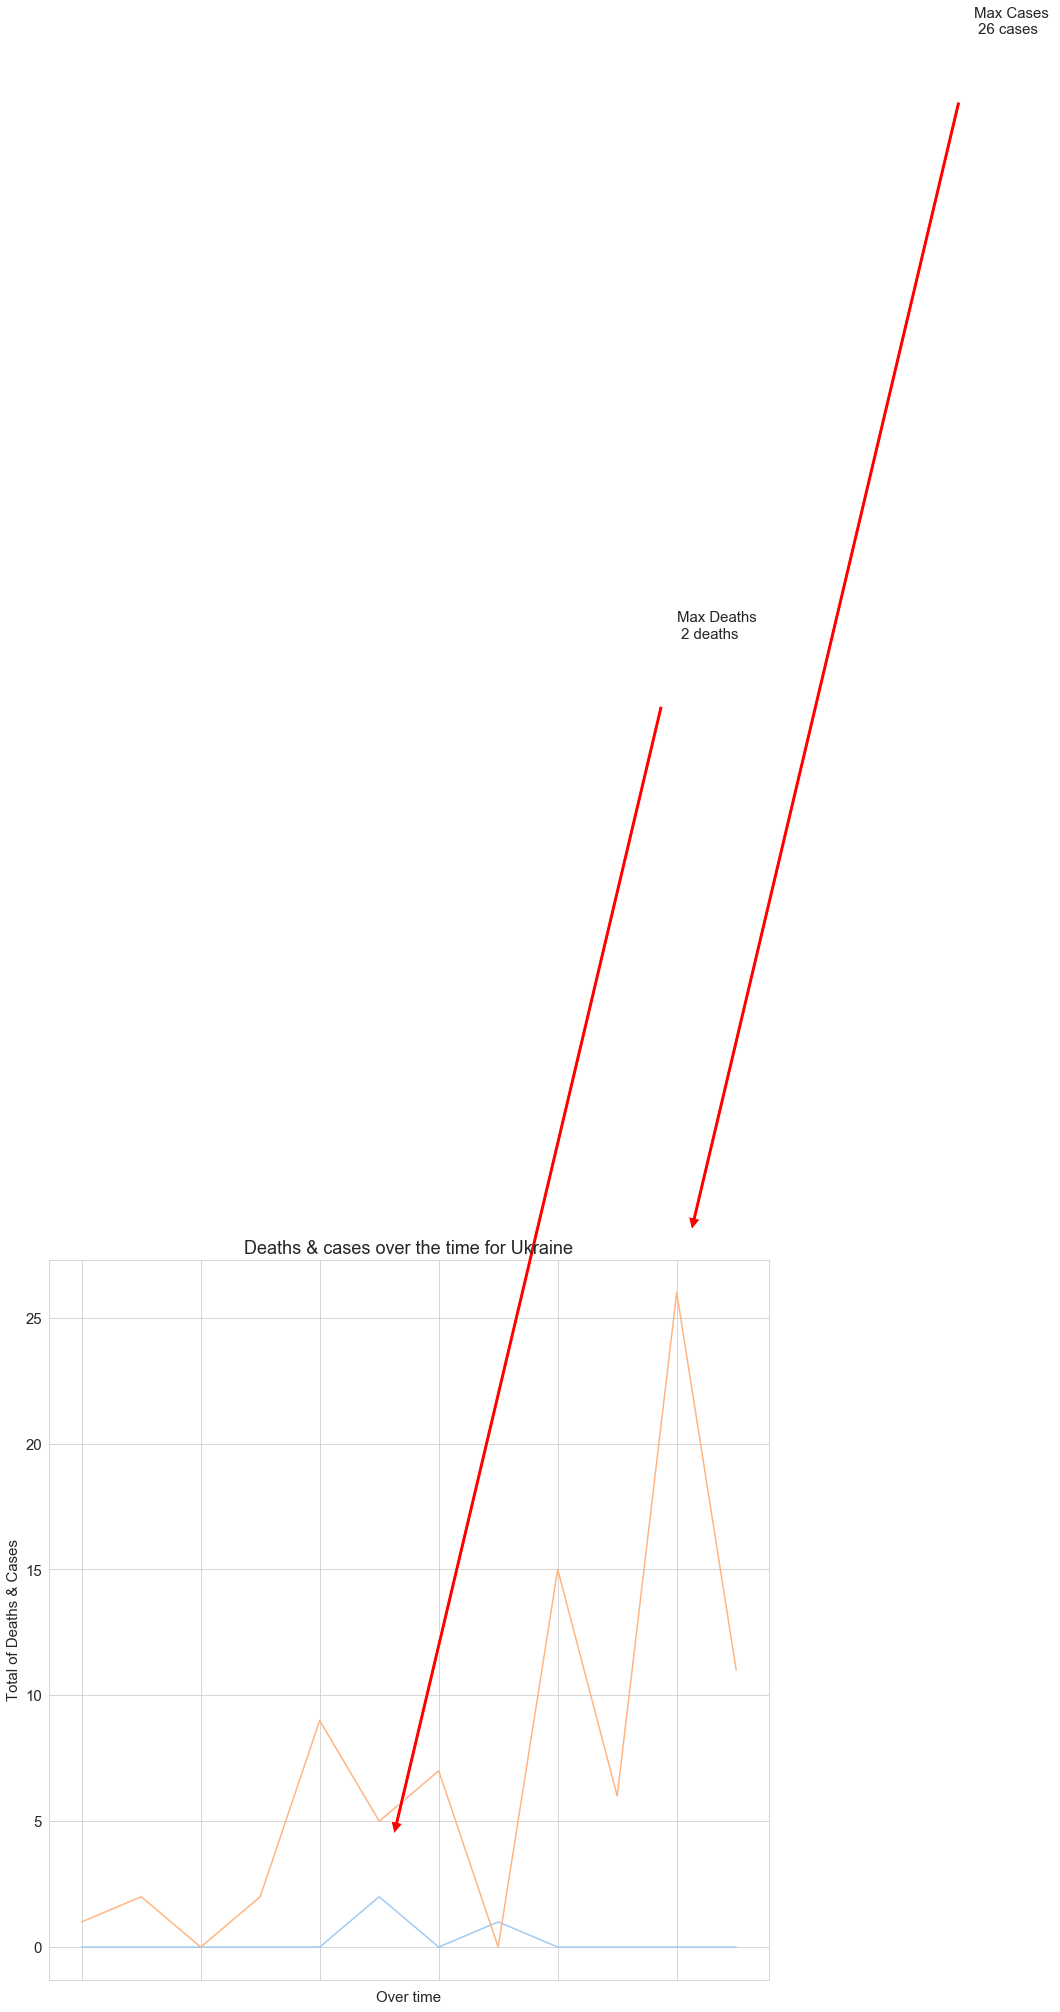

In [41]:
time_series_by_country('Ukraine')